# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
# Make sure plots display in the notebook                                            
%matplotlib inline

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [275]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [276]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&appid="+weather_api_key # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] 
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_wind = city_weather['wind']['speed']
        city_clouds = city_weather['clouds']['all'] 
        city_country = city_weather['sys']['country'] 
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crane
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | anloga
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | viedma
Processing Record 10 of Set 1 | den burg
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | oranjemund
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | peebles
Processing Record 15 of Set 1 | poronaysk
Processing Record 16 of Set 1 | laojunmiao
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | tasqala
Processing Record 21 of Set 1 | burang
Processing Record 22 of Set 1 | saudarkrokur
Proc

In [277]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [278]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,crane,31.3974,-102.3501,20.02,14,0,9.83,US,1739657481
1,bredasdorp,-34.5322,20.0403,18.49,87,17,1.67,ZA,1739657749
2,port-aux-francais,-49.3500,70.2167,7.78,88,100,14.25,TF,1739657750
3,olonkinbyen,70.9221,-8.7187,-4.12,75,96,3.29,SJ,1739657751
4,anloga,5.7947,0.8973,27.83,83,56,4.65,GH,1739657752


In [279]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [280]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,20.02,14,0,9.83,US,1739657481
1,bredasdorp,-34.5322,20.0403,18.49,87,17,1.67,ZA,1739657749
2,port-aux-francais,-49.3500,70.2167,7.78,88,100,14.25,TF,1739657750
3,olonkinbyen,70.9221,-8.7187,-4.12,75,96,3.29,SJ,1739657751
4,anloga,5.7947,0.8973,27.83,83,56,4.65,GH,1739657752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

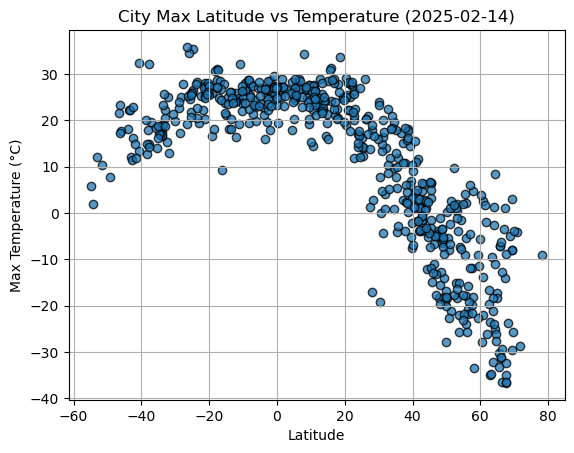

In [281]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            edgecolors="black", linewidth=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2025-02-14)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)  # Add grid for better readability

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

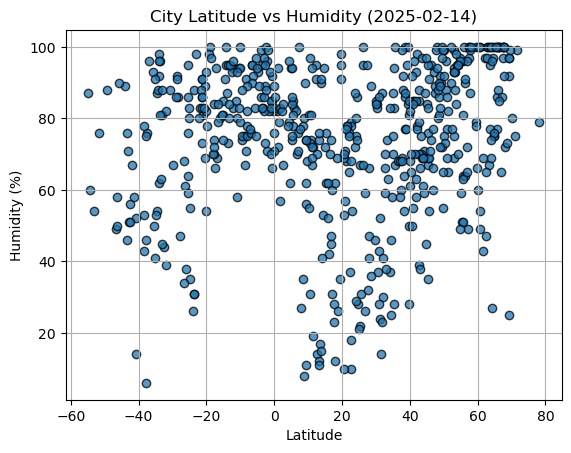

In [283]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            edgecolors="black", linewidth=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2025-02-14)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)  # Add grid for better readability

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

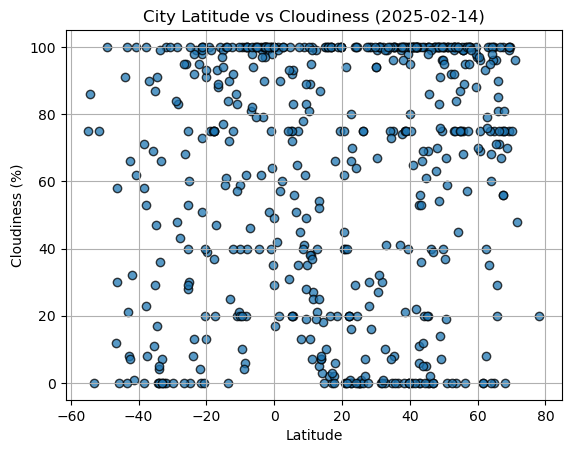

In [285]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            edgecolors="black", linewidth=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2025-02-14)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)  # Add grid for better readability

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

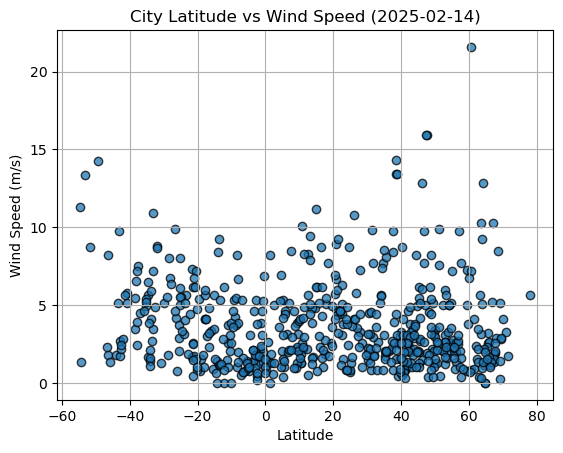

In [287]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            edgecolors="black", linewidth=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2025-02-14)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)  # Add grid for better readability

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [291]:
def plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path):

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate regression line values
    regression_values = x_values * slope + intercept

    # Calculate R-squared value
    r_squared = r_value ** 2
    print(f"The r²-value is: {r_squared}")

    # Create scatter plot
    plt.scatter(x_values, y_values, color="steelblue", linewidth=1, alpha=1, label="Data Points")
    
    # Plot regression line
    plt.plot(x_values, regression_values, color="red", linewidth=1, label="Regression Line")


    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Annotate only the regression equation
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, xy=(positionx,positiony), xycoords='axes fraction', fontsize=15, color="red")
   
    # Save the figure
    plt.savefig(save_path, bbox_inches="tight", dpi=300)

    # Show plot
    plt.show()

In [292]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,20.02,14,0,9.83,US,1739657481
3,olonkinbyen,70.9221,-8.7187,-4.12,75,96,3.29,SJ,1739657751
4,anloga,5.7947,0.8973,27.83,83,56,4.65,GH,1739657752
9,den burg,53.0542,4.7972,1.99,75,100,3.09,NL,1739657758
12,college,64.8569,-147.8028,-17.18,75,75,0.00,US,1739657761


In [293]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,18.49,87,17,1.67,ZA,1739657749
2,port-aux-francais,-49.3500,70.2167,7.78,88,100,14.25,TF,1739657750
5,adamstown,-25.0660,-130.1015,25.92,80,30,8.02,PN,1739657753
6,lebu,-37.6167,-73.6500,14.80,76,8,7.53,CL,1739657754
7,invercargill,-46.4000,168.3500,23.34,58,30,1.79,NZ,1739657756


###  Temperature vs. Latitude Linear Regression Plot

The r²-value is: 0.7545655757047159


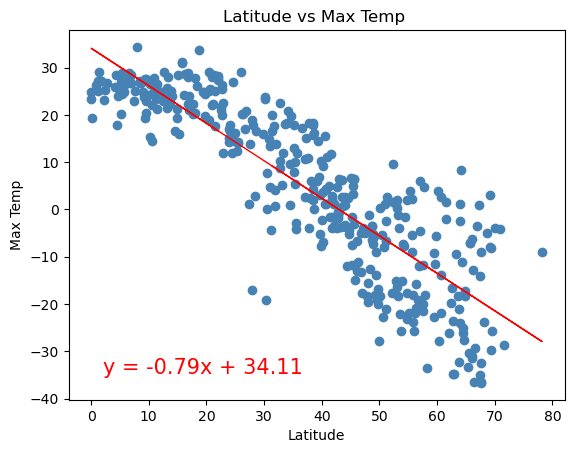

In [294]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df["Lat"]  # Latitude
y_values = northern_hemi_df["Max Temp"]  # Maximum Temperature

# Define plot title, labels, and save path
title = "Latitude vs Max Temp "
x_label = "Latitude"
y_label = "Max Temp"
save_path = "output_data/Northern_Hemi_Lat_vs_Temp_Regression.png"
positionx = 0.07
positiony = 0.07

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)

The r²-value is: 0.29867861946491725


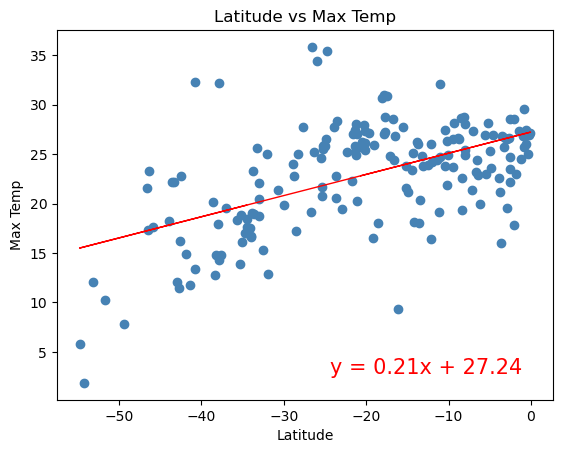

In [295]:
# Linear regression on Southern Hemisphere
# Define the x and y values
x_values = southern_hemi_df["Lat"]  # Latitude
y_values = southern_hemi_df["Max Temp"]  # Maximum Temperature

# Define plot title, labels, and save path
title = "Latitude vs Max Temp"
x_label = "Latitude"
y_label = "Max Temp"
save_path = "output_data/Southern_Hemi_Lat_vs_Temp_Regression.png"
positionx = 0.55
positiony = 0.07

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)

**Discussion about the linear relationship:** 

Analysis of Latitude vs Temperature

R² VALUES
NORTHERN HEMISPHERE: R² = 0.754
SOUTHERN HEMISPHERE: R² = 0.298
ANALYSIS 
R² = 75.4% indicates a strong relationship between latitude and maximum temperature, suggesting that the data points are closely clustered around the regression line, which fits the data well.
R² = 29.8% indicates a moderate to weak relationship between latitude and maximum temperature, suggesting that the data points are widely scattered around the regression line. The does not fit the data very well.
CONCLUSION: The Northern Hemisphere Latitude vs. Temperature regression model is more reliable for making predictions compared to the Southern Hemisphere Latitude vs. Temperature regression model.

SLOPE
NORTHERN HEMISPHERE: The negative slope (-0.79) on the regression line of the northern hemisphere graph indicates that the farther a city is from the equator, towards the North Pole, the colder it gets.
SOUTHERN HEMISPHERE: The positive slope (0.21) on the regression line of the southern hemisphere graph also suggests that as one moves away from the equator, the temperature decreases.
ANALYSIS: The line with a slope of (-0.79) is steeper than that with a slope of (0.21), indicating that the temperature decreases at a lower rate as one moves away from the equator in the southern hemisphere compared to the northern hemisphere.
CONCLUSION: This indicates a higher shift in temperature in the north.

RANGES
NORTHERN HEMISPHERE
Temperature Range: -38°C to 37°C
Latitude Range: 0° to 80°
Temperature around 50° latitude: -30°C to 10°C
SOUTHERN HEMISPHERE
Temperature Range: 2°C to 37°C
Latitude Range: 0° to -60°
Temperature around -50° latitude: 7°C to 14°C
ANALYSIS: There are many cities between the 60° and 80° latitudes in the Northern Hemisphere compared to none in the -60° to -80° latitude range of the Southern Hemisphere. Therefore, comparing temperatures around ±50° latitude shows that temperatures tend to become much colder—almost more than twice as cold in the northern hemisphere—compared to those at the same distance from the equator in the southern hemisphere.
CONCLUSION: This indicates that the sun rays are shining on Earth more towards the south, which is typical during the winter season.



### Humidity vs. Latitude Linear Regression Plot

The r²-value is: 0.099991002821284


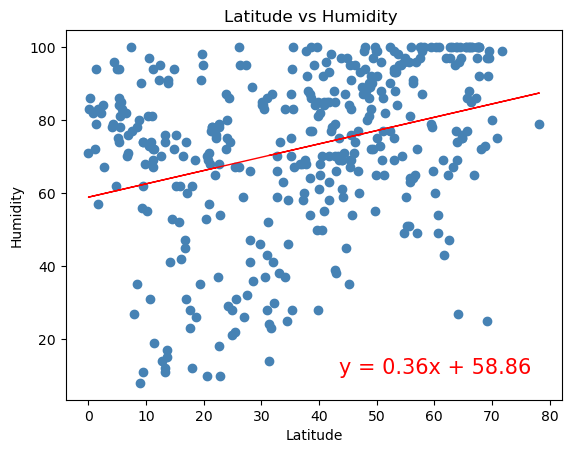

In [296]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df["Lat"]  # Latitude
y_values = northern_hemi_df["Humidity"]  # Humidity

# Define plot title, labels, and save path
title = "Latitude vs Humidity "
x_label = "Latitude"
y_label = "Humidity"
save_path = "output_data/Northern_Hemi_Lat_vs_Humidity.png"
positionx = 0.55
positiony = 0.07

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)


The r²-value is: 0.1907852843082546


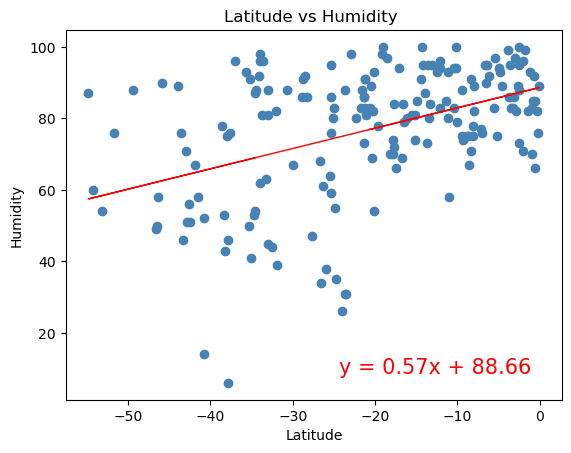

In [297]:
# Linear regression on Southern Hemisphere
# Define the x and y values
x_values = southern_hemi_df["Lat"]  # Latitude
y_values = southern_hemi_df["Humidity"]  # Humidity

# Define plot title, labels, and save path
title = "Latitude vs Humidity "
x_label = "Latitude"
y_label = "Humidity"
save_path = "output_data/Southern_Hemi_Lat_vs_Humidity.png"

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)

**Discussion about the linear relationship:**
Analysis of Latitude vs Humidity

R² VALUES
NORTHERN HEMISPHERE: R² = 0.099
SOUTHERN HEMISPHERE: R² = 0.199
ANALYSIS
Both hemispheres' humidity vs. latitude plots present low R² values of 9.9% and 19.9%, indicating that the data points are widely scattered around the regression lines. This suggests a weak relationship between latitude and humidity in both hemispheres.
CONCLUSION
The correlation between humidity and latitude is weak, meaning that other factors influence humidity levels besides distance from the equator, such as proximity to water bodies. Meaning, the regression line is not a strong indicator of correlation.
 
SLOPE
NORTHERN HEMISPHERE
The positive slope (0.36) on the regression line of the Northern Hemisphere graph indicates that as one moves away from the equator towards the North Pole, humidity tends to increase.
SOUTHERN HEMISPHERE
The positive slope (0.57) on the regression line of the Southern Hemisphere graph suggests that as one moves toward the equator, humidity also tends to increase.
ANALYSIS AND CONCLUSION
Humidity is generally higher in the northern regions of both the Northern and Southern Hemispheres. However, since the r^2 values are very low, the regression line might not be a strong indicator. 
 
RANGES
NORTHERN HEMISPHERE
Humidity Range: Approximately 6% to 100%
Latitude Range: 0 to 80
Humidity at 50° latitude and above: Approximately 45% to 100%
SOUTHERN HEMISPHERE
Humidity Range: Approximately 10% to 100%
Latitude Range: 0 to -50
Humidity at -50° latitude and below: Approximately 47% to 96%
ANALYSIS
The humidity ranges are similar in both hemispheres, but the Southern Hemisphere shows slightly higher humidity levels at comparable latitudes.
Beyond 50° latitude in the north and below -50° latitude in the south, both graphs display high levels of humidity ranging between 40% and 100%.
CONCLUSION
Although humidity is largely independent of latitude, as one moves closer to the poles, humidity levels remain above 40%. This suggests that the air in both the northern and southern regions of the Earth is not dry, which makes sense considering the icecaps/ glaciers on both poles, which might be melting. 


### Cloudiness vs. Latitude Linear Regression Plot

The r²-value is: 0.04878426196073874


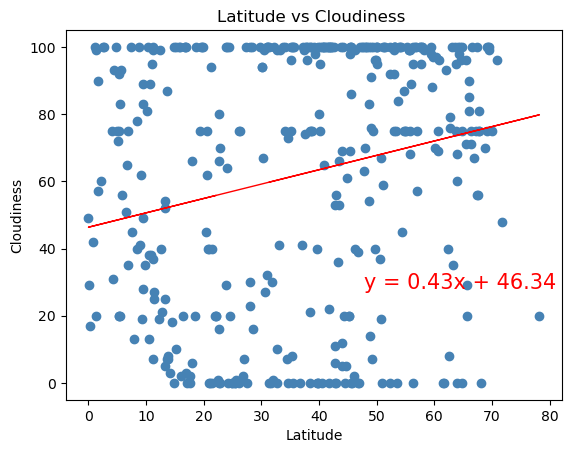

In [298]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df["Lat"]  # Latitude
y_values = northern_hemi_df["Cloudiness"]  # Cloudiness

# Define plot title, labels, and save path
title = "Latitude vs Cloudiness "
x_label = "Latitude"
y_label = "Cloudiness"
save_path = "output_data/Northern_Hemi_Lat_vs_Cloudiness.png"
# positioning the equation
positionx = 0.6
positiony = 0.3
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)

The r²-value is: 0.13986178903640875


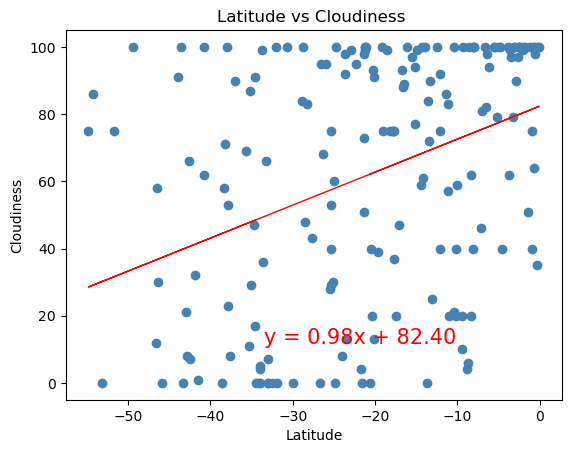

In [299]:
# Linear regression on Southern Hemisphere
# Define the x and y values
x_values = southern_hemi_df["Lat"]  # Latitude
y_values = southern_hemi_df["Cloudiness"]  # Cloudiness

# Define plot title, labels, and save path
title = "Latitude vs Cloudiness "
x_label = "Latitude"
y_label = "Cloudiness"
save_path = "output_data/Southern_Hemi_Lat_vs_Cloudiness.png"

# positioning the equation
positionx = 0.4
positiony = 0.15

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)

**Discussion about the linear relationship:** 
Analysis of Latitude vs Cloudiness

R² VALUES
NORTHERN HEMISPHERE: R² = 0.048
SOUTHERN HEMISPHERE: R² = 0.139
ANALYSIS
Both R² values suggest a very weak relationship between latitude and cloudiness in both hemispheres.
CONCLUSION
The data points are widely scattered around the regression lines, and the regression lines do not fit the data very well;  this lack of correlation indicates that Latitude is not a strong predictor of cloudiness in either hemisphere. 

SLOPE
NORTHERN HEMISPHERE: The positive slope (0.43) 
SOUTHERN HEMISPHERE: The positive slope (0.98) 
CONCLUSION
Although both positive slopes indicate that in the Northern Hemisphere, it seems cloudier towards the North, while in the Southern Hemisphere, cloudiness tends to increase closer to the equator. The regression models for both hemispheres are not very reliable for predicting cloudiness based on latitude alone, as the R² values are low.

RANGE 
No visible patterns observed from analyzing ranges, especially considering the low r^2 values for both graphs. The data is too spread out; indicating cloudiness and uncloudiness seem to sporadically exist throught the globe. 


### Wind Speed vs. Latitude Linear Regression Plot

The r²-value is: 0.0005336246518946191


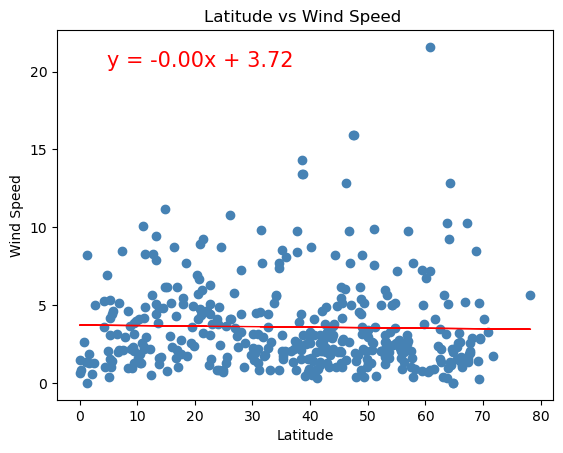

In [300]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df["Lat"]  # Latitude
y_values = northern_hemi_df["Wind Speed"]  # Wind Speed

# Define plot title, labels, and save path
title = "Latitude vs Wind Speed "
x_label = "Latitude"
y_label = "Wind Speed"
save_path = "output_data/Northern_Hemi_Lat_vs_Wind_Speed.png"

# positioning the equation
positionx = 0.1
positiony = 0.9

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)


The r²-value is: 0.17194947995298446


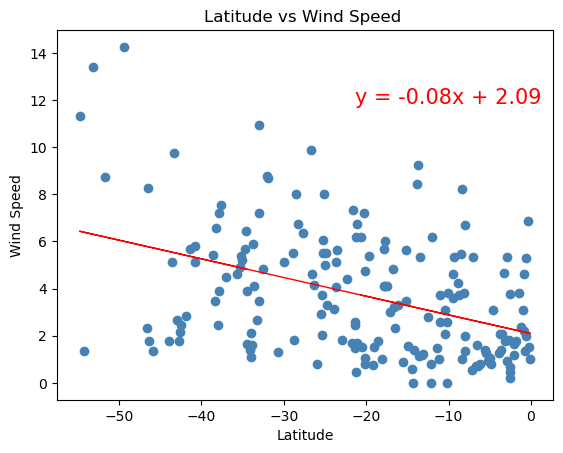

In [301]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = southern_hemi_df["Lat"]  # Latitude
y_values = southern_hemi_df["Wind Speed"]  # Wind Speed

# Define plot title, labels, and save path
title = "Latitude vs Wind Speed "
x_label = "Latitude"
y_label = "Wind Speed"
save_path = "output_data/Southern_Hemi_Lat_vs_Wind_Speed.png"

# positioning the equation
positionx = 0.6
positiony = 0.8

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, title, x_label, y_label, save_path)

**Discussion about the linear relationship:** 

Analysis Latitude Vs Wind Speed 
R² VALUES
NORTHERN HEMISPHERE: R² = 0.0005
SOUTHERN HEMISPHERE: R² = 0.1719
ANALYSIS
The low R² values for both the Northern and Southern Hemispheres suggest a very weak relationship between latitude and wind speed, particularly in the Southern Hemisphere. In both cases, the data points are widely scattered around the regression lines, and the regression lines do not fit the data well.
CONCLUSION
Latitude is not a strong predictor of wind speed in either hemisphere. Other factors likely play a more significant role in determining wind speed.
 
SLOPE
NORTHERN HEMISPHERE: Slope: 0.00
The slope of the regression line in the Northern Hemisphere graph indicates that there is no significant change in wind speed across cities in the Northern Hemisphere.
SOUTHERN HEMISPHERE: Slope: -0.08
The regression line of the Southern Hemisphere graph suggests that wind speed decreases slightly as cities move away from the equator.
ANALYSIS
In the Northern Hemisphere, wind speed remains relatively constant regardless of latitude. In the Southern Hemisphere, wind speed decreases slightly as one moves away from the equator, but the slope is very small, and so is the R² value.
CONCLUSION
Latitude has little to no effect on wind speed in the Northern Hemisphere and only a slight effect in the Southern Hemisphere. The wind speed seem to also vary across the cities in the southern hemisphere compared to that in the northern hemisphere. However, given the low R² values, this effect is not statistically significant.
 
RANGE
ANALYSIS
NORTHERN HEMISPHERE
Wind speeds range between 0 and 10, mainly clustered between 0 m/s  and 6 m/s.
Winds appear to pick up the most speed around latitudes 60° to 70°.
SOUTHERN HEMISPHERE
Wind speeds range between 0 and 10, mainly clustered between 0 m/s and 6 m/s.
Winds appear to pick up the most speed around latitudes -50° to -60°.
CONCLUSION
Wind speeds tend to increase about 40 degrees in latitude from the equator.However, since wind is always moving, and the weather changing, it is difficult to establish a correlation between wind speed and latitude.